In [1]:
import os
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_pass = os.getenv('DB_PASS')
db_name = os.getenv('DB_NAME')

connection = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection)

In [3]:
table = 'customers'
query = f"""
SELECT event_time, price, user_id
FROM {table}
WHERE event_type = 'purchase'
"""

In [4]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    data = pd.read_sql(query, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

# Mostrar las primeras filas del DataFrame
data.head()

,event_time,price,user_id
0,2022-12-01 00:17:50,0.38,473613801
1,2022-12-01 00:17:50,0.38,473613801
2,2022-12-01 00:17:50,0.38,473613801
3,2022-12-01 00:17:50,0.37,473613801
4,2022-12-01 00:17:50,0.38,473613801


In [6]:
data_chart = {
    'count' : data['price'].count(),
    'mean' : data['price'].mean(),
    'std' : data['price'].std(),
    'min' : data['price'].min(),
    '25%' : data['price'].quantile(0.25),
    '50%' : data['price'].quantile(0.50),
    '75%' : data['price'].quantile(0.75),
    'max' : data['price'].max(),
}

for key, value in data_chart.items():
    print(f"{key}: {value}")


count: 1044131
mean: 4.92108098504881
std: 8.85438980110809
min: -79.37
25%: 1.59
50%: 3.0
75%: 5.4
max: 327.78


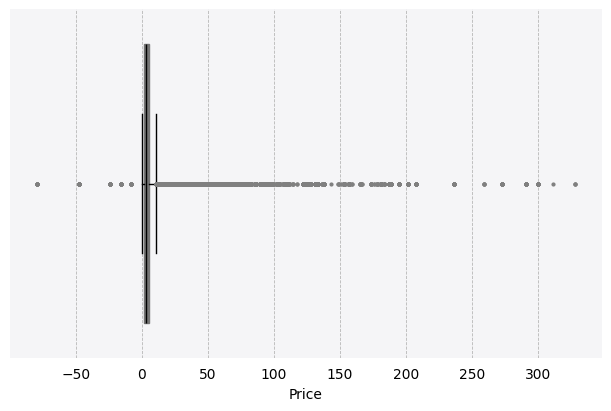

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=2,
              markeredgecolor='grey')
medianprops = dict(linestyle='-', color='black')
box = ax.boxplot(
    data['price'], 
    vert=False, 
    medianprops = medianprops,
    flierprops=flierprops,
    patch_artist=True,
    zorder=3,
    widths=0.8
)

for b in box['boxes']:
    b.set_facecolor('#757575')
    b.set_edgecolor('#757575')
ax.set_xlabel('Price')
ax.set_yticks([])
ax.grid(True, zorder=0)

ax.set_facecolor('#F5F5F7')  # Fondo azul claro en hexadecimal
ax.spines['top'].set_visible(False)      # Desactivar borde superior
ax.spines['right'].set_visible(False)    # Desactivar borde derecho
ax.spines['left'].set_visible(False)     # Desactivar borde izquierdo
ax.spines['bottom'].set_visible(False)   # Desactivar borde inferior
ax.grid(True, zorder=0, color='#B7B7B7', linestyle='--', linewidth=0.6) 
# Quitar las marcas (ticks) del eje X y Y
ax.tick_params( which='both', bottom=False, top=False)

plt.show()


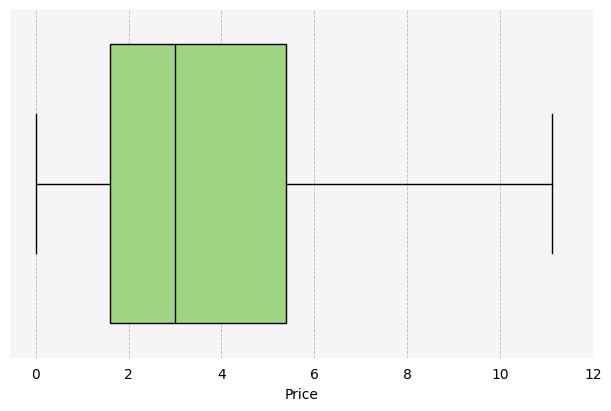

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

flierprops = dict(
    marker='o',
    markerfacecolor='grey', 
    markersize=2,
    markeredgecolor='grey'
)
medianprops = dict(linestyle='-', color='black')
box = ax.boxplot(
    data['price'],
    vert=False,
    medianprops = medianprops, 
    showfliers=False,
    patch_artist=True,
    zorder=3,
    widths=0.8
)

for b in box['boxes']:
    b.set_facecolor('#A0D683')
ax.set_xlabel('Price')
ax.set_yticks([])

# Configurar los ticks del eje X

ax.set_xticks(range(0, 13, 2))  # Establecer ticks en 0, 2, 4, 6, 8, 10, 12

ax.grid(True, zorder=0)

ax.set_facecolor('#F5F5F7')  # Fondo azul claro en hexadecimal
ax.spines['top'].set_visible(False)      # Desactivar borde superior
ax.spines['right'].set_visible(False)    # Desactivar borde derecho
ax.spines['left'].set_visible(False)     # Desactivar borde izquierdo
ax.spines['bottom'].set_visible(False)   # Desactivar borde inferior
ax.grid(True, zorder=0, color='#B7B7B7', linestyle='--', linewidth=0.6) 
# Quitar las marcas (ticks) del eje X y Y
ax.tick_params( which='both', bottom=False, top=False)

plt.show()

# Average basket price for user

In [8]:
query = f"""
SELECT user_id, 
AVG(price) AS average_cart
FROM {table} 
WHERE event_type = 'cart' 
GROUP BY user_id HAVING AVG(price) BETWEEN 28 AND 36.5
"""

In [9]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    data = pd.read_sql(query, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

# Mostrar las primeras filas del DataFrame
data.head()

,user_id,average_cart
0,33805090,31.350000
1,55849756,33.503333
2,60573768,35.988571
3,92381432,33.590000
4,106471075,30.440778


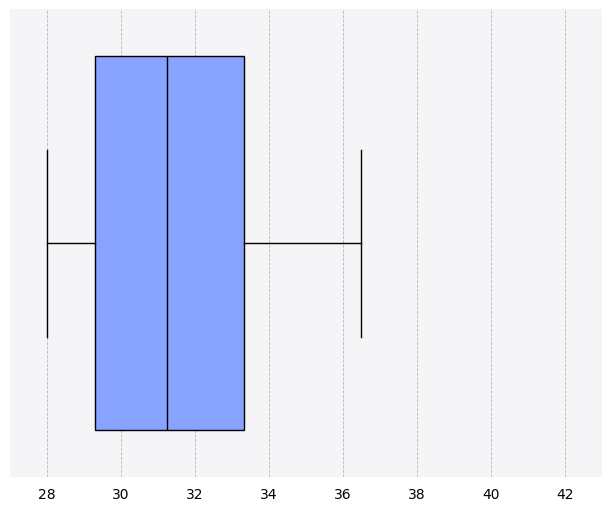

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5), layout='constrained')

flierprops = dict(
    marker='o',
    markerfacecolor='grey', 
    markersize=2,
    markeredgecolor='grey'
)
medianprops = dict(linestyle='-', color='black')
chart_data = data['average_cart']
box = ax.boxplot(
    chart_data, 
    vert=False,
    medianprops = medianprops,
    flierprops=flierprops, 
    patch_artist=True,
    zorder=3,
    widths=0.8
)

for b in box['boxes']:
    b.set_facecolor('#87A2FF')
ax.set_yticks([])

ax.grid(True, zorder=0)
ax.set_xlim(27, 43) # limites lineas verticales

ax.set_facecolor('#F5F5F7')  # Fondo en hexadecimal
ax.spines['top'].set_visible(False)      # Desactivar borde superior
ax.spines['right'].set_visible(False)    # Desactivar borde derecho
ax.spines['left'].set_visible(False)     # Desactivar borde izquierdo
ax.spines['bottom'].set_visible(False)   # Desactivar borde inferior
ax.grid(True, zorder=0, color='#B7B7B7', linestyle='--', linewidth=0.6) 
# Quitar las marcas (ticks) del eje X y Y
ax.tick_params( which='both', bottom=False, top=False)

plt.show()